In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, Reshape, Conv1D, MaxPool1D, TimeDistributed, GRU
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from code.util import *
from code.modelhelper import *

c:\program files\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\program files\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\program files\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\program files\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dty

In [2]:
CVECT = 100
UCHARS = 139
NCLASS = 2
BATCH_SIZE = 192
EPOCHS = 300

In [3]:
x = np.load("data/xy/x_char_onehot_45_15.npz")["arr_0"]
y = np.load("data/xy/y_onehot_45_15.npy")
x.shape, y.shape

((60000, 13900), (60000, 2))

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=11
)

In [5]:
model_input = Input(shape=(CVECT*UCHARS,), name="m2_input")
H = Reshape((CVECT, UCHARS, 1), name="m2_reshape")(model_input)

H = TimeDistributed(
    Conv1D(
        filters=20, 
        kernel_size=(2), 
        padding='same', 
        activation='tanh',
        name="m2_conv1d_1"
    ),
    name="m2_timedistributed_1"
)(H)
H = TimeDistributed(MaxPool1D(2, name="m2_maxpool1d_1"), name="m2_timedistributed_2")(H)

H = TimeDistributed(
    Conv1D(
        filters=20, 
        kernel_size=(2), 
        padding='same', 
        activation='tanh',
        name="m2_conv1d_2"
    ),
    name="m2_timedistributed_3"
)(H)
H = TimeDistributed(MaxPool1D(2, name="m2_maxpool1d_2"), name="m2_timedistributed_4")(H)

H = TimeDistributed(
    Conv1D(
        filters=20, 
        kernel_size=(2), 
        padding='same', 
        activation='tanh',
        name="m2_conv1d_3"
    ),
    name="m2_timedistributed_5"
)(H)
H = TimeDistributed(MaxPool1D(2, name="m2_maxpool1d_3"), name="m2_timedistributed_6")(H)

H = TimeDistributed(Flatten(name="m2_flatten"), name="m2_timedistributed_7")(H)
H = Dropout(0.5, name="m2_dropout_1")(H)
H = GRU(256, return_sequences=True, name="m2_gru_1")(H)
H = GRU(256, return_sequences=False, go_backwards=True, name="m2_gru_2")(H)
H = Dropout(rate=0.5, name="m2_dropout_2")(H)
H = Dense(64, activation='tanh', name="m2_dense_1")(H)
model_output = Dense(2, activation='softmax', name="m2_output")(H)

model = Model(model_input, model_output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m2_input (InputLayer)        [(None, 13900)]           0         
_________________________________________________________________
m2_reshape (Reshape)         (None, 100, 139, 1)       0         
_________________________________________________________________
m2_timedistributed_1 (TimeDi (None, 100, 139, 20)      60        
_________________________________________________________________
m2_timedistributed_2 (TimeDi (None, 100, 69, 20)       0         
_________________________________________________________________
m2_timedistributed_3 (TimeDi (None, 100, 69, 20)       820       
_________________________________________________________________
m2_timedistributed_4 (TimeDi (None, 100, 34, 20)       0         
_________________________________________________________________
m2_timedistributed_5 (TimeDi (None, 100, 34, 20)       820   

In [6]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

es = EarlyStopping(
    mode="auto",
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=2,
    validation_data=(x_test, y_test),
    callbacks=[es]
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/300
48000/48000 - 57s - loss: 0.3790 - accuracy: 0.8226 - val_loss: 0.2959 - val_accuracy: 0.8696
Epoch 2/300
48000/48000 - 51s - loss: 0.3079 - accuracy: 0.8653 - val_loss: 0.2894 - val_accuracy: 0.8798
Epoch 3/300
48000/48000 - 51s - loss: 0.2427 - accuracy: 0.9021 - val_loss: 0.1629 - val_accuracy: 0.9362
Epoch 4/300
48000/48000 - 51s - loss: 0.1619 - accuracy: 0.9392 - val_loss: 0.1358 - val_accuracy: 0.9487
Epoch 5/300
48000/48000 - 51s - loss: 0.1348 - accuracy: 0.9520 - val_loss: 0.1157 - val_accuracy: 0.9591
Epoch 6/300
48000/48000 - 51s - loss: 0.1175 - accuracy: 0.9593 - val_loss: 0.1008 - val_accuracy: 0.9642
Epoch 7/300
48000/48000 - 51s - loss: 0.1055 - accuracy: 0.9635 - val_loss: 0.0902 - val_accuracy: 0.9679
Epoch 8/300
48000/48000 - 51s - loss: 0.0975 - accuracy: 0.9656 - val_loss: 0.0899 - val_accuracy: 0.9682
Epoch 9/300
48000/48000 - 51s - loss: 0.0858 - accuracy: 0.9703 - val_loss: 0.0852 - val_accuracy: 0.9

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_model = model.predict(x_test)
y_pred = to_bin(y_pred_model)
print("Test recall: {}".format(recall(y_test, y_pred)))

y_test0 = to_1D(y_test)
y_pred0 = to_1D(y_pred)
print(confusion_matrix(y_test0, y_pred0))

Test loss: 0.07760489643489321
Test accuracy: 0.97241664
Test recall: 0.9395065900642109
[[8889  152]
 [ 179 2780]]


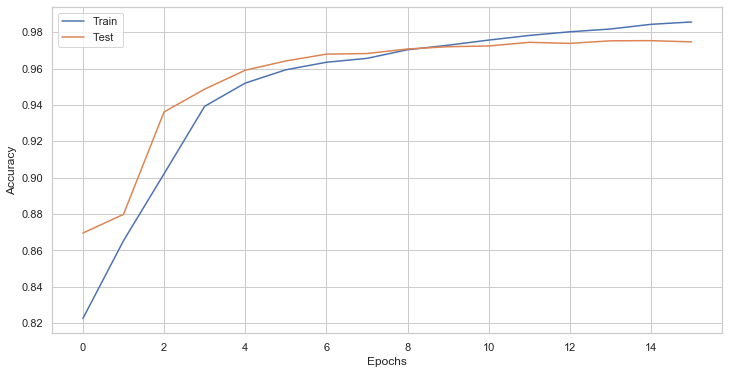

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [8]:
model.save("models/dl/m2.h5")